In [1]:
# Carregando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Importando registros 
Registros_centro = pd.read_excel('Registros_Centro.xlsx')
Registros_centro = Registros_centro.apply(lambda x: x.str.strip() if x.dtype == "object" else x)# Retirando espaços em branco
print(Registros_centro)

          NUMERO_BOLETIM                        DESC_TIPO_ACIDENTE  \
0     2017-034438990-001  ATROPELAMENTO DE PESSOA SEM VITIMA FATAL   
1     2017-034512721-001                   ABALROAMENTO COM VITIMA   
2     2017-035699720-001  ATROPELAMENTO DE PESSOA SEM VITIMA FATAL   
3     2017-035769564-001  ATROPELAMENTO DE PESSOA SEM VITIMA FATAL   
4     2017-035778537-001                   ABALROAMENTO COM VITIMA   
...                  ...                                       ...   
1622  2019-055538489-001                   ABALROAMENTO COM VITIMA   
1623  2019-055674489-001  ATROPELAMENTO DE PESSOA SEM VITIMA FATAL   
1624  2019-055802785-001                   ABALROAMENTO COM VITIMA   
1625  2019-055876803-001  ATROPELAMENTO DE PESSOA SEM VITIMA FATAL   
1626  2019-038564310-001  ATROPELAMENTO DE PESSOA SEM VITIMA FATAL   

     INDICADOR_FATALIDADE  
0                     NÃO  
1                     NÃO  
2                     NÃO  
3                     NÃO  
4                  

In [3]:
# Verificando os tipos de acidentes
coluna01 = Registros_centro['DESC_TIPO_ACIDENTE']
tipos_acidentes = coluna01.unique()
print(tipos_acidentes)

['ATROPELAMENTO DE PESSOA SEM VITIMA FATAL' 'ABALROAMENTO COM VITIMA'
 'QUEDA DE PESSOA DE VEICULO' 'CHOQUE MECANICO COM VITIMA'
 'COLISAO DE VEICULOS COM VITIMA' 'OUTROS COM VITIMA'
 'QUEDA DE VEICULO COM VITIMA' 'CAPOTAMENTO/TOMBAMENTO COM VITIMA'
 'ATROPELAMENTO DE PESSOA COM VITIMA FATAL']


In [4]:
# Simplificando a descrição dos acidentes segundo a ABNT NBR 10697
Registros_centro['DESC_TIPO_ACIDENTE'] = Registros_centro['DESC_TIPO_ACIDENTE'].replace(
    {
        'ATROPELAMENTO DE PESSOA SEM VITIMA FATAL':'ATROPELAMENTO',
        'ABALROAMENTO COM VITIMA':'ABALROAMENTO',
        'QUEDA DE PESSOA DE VEICULO':'QUEDA',
        'CHOQUE MECANICO COM VITIMA':'CHOQUE',
        'COLISAO DE VEICULOS COM VITIMA':'COLISÃO',
        'OUTROS COM VITIMA':'OUTROS',
        'QUEDA DE VEICULO COM VITIMA':'QUEDA',
        'QUEDA DE VEICULO':'QUEDA',
        'CAPOTAMENTO/TOMBAMENTO COM VITIMA':'CAPOTAMENTO/TOMBAMENTO',
        'ATROPELAMENTO DE PESSOA COM VITIMA FATAL':'ATROPELAMENTO',    
    }
)
print(Registros_centro)

          NUMERO_BOLETIM DESC_TIPO_ACIDENTE INDICADOR_FATALIDADE
0     2017-034438990-001      ATROPELAMENTO                  NÃO
1     2017-034512721-001       ABALROAMENTO                  NÃO
2     2017-035699720-001      ATROPELAMENTO                  NÃO
3     2017-035769564-001      ATROPELAMENTO                  NÃO
4     2017-035778537-001       ABALROAMENTO                  NÃO
...                  ...                ...                  ...
1622  2019-055538489-001       ABALROAMENTO                  NÃO
1623  2019-055674489-001      ATROPELAMENTO                  NÃO
1624  2019-055802785-001       ABALROAMENTO                  NÃO
1625  2019-055876803-001      ATROPELAMENTO                  NÃO
1626  2019-038564310-001      ATROPELAMENTO                  NÃO

[1627 rows x 3 columns]


In [5]:
# Complementando com as demais variáveis da pesquisa
Base_Acd_Vec_Met_proj = pd.read_excel('Base_Acd_Vec_Met_Loc.xlsx')
Base_Descritiva = pd.merge(Registros_centro,Base_Acd_Vec_Met_proj, on ='NUMERO_BOLETIM', how='inner')
print(Base_Descritiva)


          NUMERO_BOLETIM DESC_TIPO_ACIDENTE INDICADOR_FATALIDADE  \
0     2017-034438990-001      ATROPELAMENTO                  NÃO   
1     2017-034512721-001       ABALROAMENTO                  NÃO   
2     2017-035699720-001      ATROPELAMENTO                  NÃO   
3     2017-035769564-001      ATROPELAMENTO                  NÃO   
4     2017-035778537-001       ABALROAMENTO                  NÃO   
...                  ...                ...                  ...   
1622  2019-055538489-001       ABALROAMENTO                  NÃO   
1623  2019-055674489-001      ATROPELAMENTO                  NÃO   
1624  2019-055802785-001       ABALROAMENTO                  NÃO   
1625  2019-055876803-001      ATROPELAMENTO                  NÃO   
1626  2019-038564310-001      ATROPELAMENTO                  NÃO   

                       COORDENADA  MÊS  HORA       DATA  BICICLETA  \
0     -19.920010348,-43.940256854   11    17 2017-11-11          0   
1     -19.917797895,-43.930673168   11     

In [6]:
Base_Descritiva=Base_Descritiva.drop(columns=['COORDENADA', 'LATITUDE', 'LONGITUDE'])

In [7]:
Base_Descritiva.to_excel('Base_dados.xlsx')

In [7]:
# Definição das faixas horárias
faixas_hr = [-1,3,6,9,12,15,18,21,24]
Base_Descritiva['FAIXA HORÁRIA'] = pd.cut(Base_Descritiva['HORA'], bins=faixas_hr,
                                         labels=['0h-3h', '4h-6h', '7h-9h','10h-12h','13h-15h','16h-18h','19h-21h','22h-23h'])
print(Base_Descritiva)

          NUMERO_BOLETIM DESC_TIPO_ACIDENTE INDICADOR_FATALIDADE  MÊS  HORA  \
0     2017-034438990-001      ATROPELAMENTO                  NÃO   11    17   
1     2017-034512721-001       ABALROAMENTO                  NÃO   11     9   
2     2017-035699720-001      ATROPELAMENTO                  NÃO   11     9   
3     2017-035769564-001      ATROPELAMENTO                  NÃO   11    17   
4     2017-035778537-001       ABALROAMENTO                  NÃO   11    17   
...                  ...                ...                  ...  ...   ...   
1622  2019-055538489-001       ABALROAMENTO                  NÃO   11     0   
1623  2019-055674489-001      ATROPELAMENTO                  NÃO   11    17   
1624  2019-055802785-001       ABALROAMENTO                  NÃO   11    10   
1625  2019-055876803-001      ATROPELAMENTO                  NÃO   11    17   
1626  2019-038564310-001      ATROPELAMENTO                  NÃO    8    20   

           DATA  BICICLETA  MOTOCICLETA  AUTOMOVEL 

In [8]:
# Criando uma coluna ano
Base_Descritiva['ANO']=Base_Descritiva['DATA'].dt.year

In [9]:
# Excluindo colunas indesejadas
Base_Descritiva=Base_Descritiva.drop(columns=['HORA','DATA'])

In [10]:
# Análise descritiva
# Tabela de Frequência para localização do acidente
Base_Descritiva['LOCALIZAÇÃO'] = Base_Descritiva['CRUZAMENTO'].replace({True: 'CRUZAMENTO', False: 'MEIO DA QUADRA'})
tabela_frequencias_local = Base_Descritiva['LOCALIZAÇÃO'].value_counts().reset_index() # Cálculo da frequência absoluta
tabela_frequencias_local.columns = ['LOCALIZAÇÃO', 'FREQUÊNCIA ABSOLUTA']
total_registros = len(Base_Descritiva) # Cálculo da freqûencia relativa
tabela_frequencias_local['FREQUÊNCIA RELATIVA (%)'] =(tabela_frequencias_local['FREQUÊNCIA ABSOLUTA'] / total_registros).round(2)*100
tabela_frequencias_local = tabulate(tabela_frequencias_local, headers='keys', tablefmt='fancy_outline',showindex="never")
print(tabela_frequencias_local)

╒════════════════╤═══════════════════════╤═══════════════════════════╕
│ LOCALIZAÇÃO    │   FREQUÊNCIA ABSOLUTA │   FREQUÊNCIA RELATIVA (%) │
╞════════════════╪═══════════════════════╪═══════════════════════════╡
│ MEIO DA QUADRA │                   834 │                        51 │
│ CRUZAMENTO     │                   793 │                        49 │
╘════════════════╧═══════════════════════╧═══════════════════════════╛


In [13]:
# Tabela de Frequência de Acidentes Fatais e Não Fatais

freq_fatal = (Base_Descritiva['INDICADOR_FATALIDADE'] == 'SIM').sum()
freq_nao_fatal = (Base_Descritiva['INDICADOR_FATALIDADE'] == 'NÃO').sum()
total_registros = len(Base_Descritiva)
freq_relativa_fatal = (freq_fatal / total_registros).round(4) * 100
freq_relativa_nao_fatal = (freq_nao_fatal / total_registros).round(4) * 100

dados = {'INDICADOR DE FATALIDADE': ['Sim', 'Não'],
         'FREQUÊNCIA ABSOLUTA': [freq_fatal, freq_nao_fatal],
         'FREQUÊNCIA RELATIVA (%)': [freq_relativa_fatal, freq_relativa_nao_fatal]}

tabela_fatalidade = pd.DataFrame(dados)
tabela_fatalidade.to_excel('tabela_fatalidade.xlsx')
tabela_fatalidade = tabulate(tabela_fatalidade, headers='keys', tablefmt='fancy_outline', showindex="never")
print(tabela_fatalidade)

╒═══════════════════════════╤═══════════════════════╤═══════════════════════════╕
│ INDICADOR DE FATALIDADE   │   FREQUÊNCIA ABSOLUTA │   FREQUÊNCIA RELATIVA (%) │
╞═══════════════════════════╪═══════════════════════╪═══════════════════════════╡
│ Sim                       │                    12 │                      0.74 │
│ Não                       │                  1615 │                     99.26 │
╘═══════════════════════════╧═══════════════════════╧═══════════════════════════╛


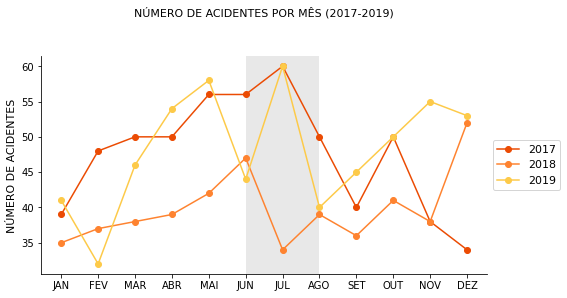

In [14]:
# Analisando a Sazonalidade Mensal

# Filtrando por ano
Base_Descritiva_2017 = Base_Descritiva[Base_Descritiva['ANO']==2017]
Base_Descritiva_2018 = Base_Descritiva[Base_Descritiva['ANO']==2018]
Base_Descritiva_2019 = Base_Descritiva[Base_Descritiva['ANO']==2019]

# Agrupando os dados por mês e contando o número de ocorrências em cada mês
num_mês_2017 = [Base_Descritiva_2017['MÊS'].value_counts().sort_index()[i] for i in range(1, 13)]
num_mês_2018 = [Base_Descritiva_2018['MÊS'].value_counts().sort_index()[i] for i in range(1, 13)]
num_mês_2019 = [Base_Descritiva_2019['MÊS'].value_counts().sort_index()[i] for i in range(1, 13)]
mês =['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']

# Plotando um gráfico de barras com o número de acidentes por mês
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(8, 4))
plt.plot(mês, num_mês_2017, color='#EB4B03', marker='o', linestyle='-', label='2017')
plt.plot(mês, num_mês_2018, color='#FE8330', marker='o', linestyle='-', label='2018')
plt.plot(mês, num_mês_2019, color='#FDCA49', marker='o', linestyle='-', label='2019')
plt.ylabel('NÚMERO DE ACIDENTES', fontsize=11)
plt.title('NÚMERO DE ACIDENTES POR MÊS (2017-2019)', pad=40, fontsize=11)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvspan(5, 7, facecolor='lightgrey', alpha=0.5) # Faixa cinza
plt.legend( loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)
plt.savefig('Sazonalidade_Mês.png', dpi=300, bbox_inches='tight')
plt.show()


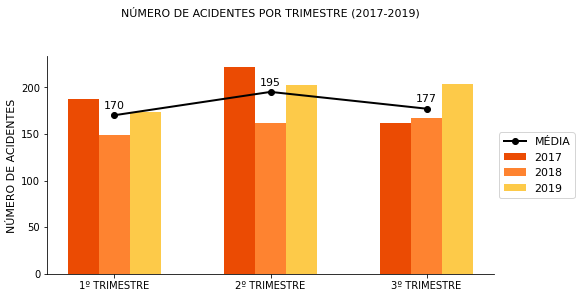

In [15]:
# Analisando a Sazonalidade por Trimestre

# Agrupando os dados por trimestre e contando o número de ocorrências em cada trimestre
num_tri_2017 = [sum(num_mês_2017[:4]), sum(num_mês_2017[4:8]), sum(num_mês_2017[8:])]
num_tri_2018 = [sum(num_mês_2018[:4]), sum(num_mês_2018[4:8]), sum(num_mês_2018[8:])]
num_tri_2019 = [sum(num_mês_2019[:4]), sum(num_mês_2019[4:8]), sum(num_mês_2019[8:])]

trimestre = ['1º TRIMESTRE', '2º TRIMESTRE', '3º TRIMESTRE']

# Cálculo das médias trimestrais considerando os valores absolutos de cada ano
media_tri_1 = ((num_tri_2017[0] + num_tri_2018[0] + num_tri_2019[0]) / 3).round(0)
media_tri_2 = ((num_tri_2017[1] + num_tri_2018[1] + num_tri_2019[1]) / 3).round(0)
media_tri_3 = ((num_tri_2017[2] + num_tri_2018[2] + num_tri_2019[2]) / 3).round(0)

# Definindo as posições das barras nos trimestres
bar_width = 0.2
pos_tri_2017 = np.arange(len(trimestre))
pos_tri_2018 = pos_tri_2017 + bar_width
pos_tri_2019 = pos_tri_2018 + bar_width
pos_media_tri = pos_tri_2018

# Plotando um gráfico de colunas grupadas com o número de acidentes por trimestre
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(8, 4))
plt.bar(pos_tri_2017, num_tri_2017, width=bar_width, color='#EB4B03', label='2017')
plt.bar(pos_tri_2018, num_tri_2018, width=bar_width, color='#FE8330', label='2018')
plt.bar(pos_tri_2019, num_tri_2019, width=bar_width, color='#FDCA49', label='2019')
plt.plot(pos_media_tri, [media_tri_1, media_tri_2, media_tri_3], color='black', marker='o', linestyle='-', linewidth=2, label='MÉDIA')
plt.ylabel('NÚMERO DE ACIDENTES', fontsize=11)
plt.title('NÚMERO DE ACIDENTES POR TRIMESTRE (2017-2019)', pad=40, fontsize=11)
plt.xticks(pos_tri_2018, trimestre)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)
plt.text(pos_media_tri[0], media_tri_1+5, f'{media_tri_1:.0f}', ha='center', va='bottom', fontsize=11)
plt.text(pos_media_tri[1], media_tri_2+5, f'{media_tri_2:.0f}', ha='center', va='bottom', fontsize=11)
plt.text(pos_media_tri[2], media_tri_3+5, f'{media_tri_3:.0f}', ha='center', va='bottom', fontsize=11)
plt.savefig('Sazonalidade_Trimestre.png', dpi=300, bbox_inches='tight')
plt.show()

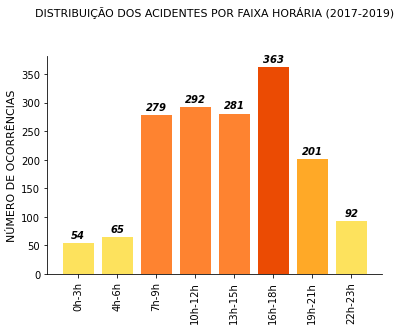

In [16]:
# Histograma

# Dados
ocorrencias_por_faixa = Base_Descritiva['FAIXA HORÁRIA'].value_counts()
faixa_horaria = ['0h-3h', '4h-6h', '7h-9h', '10h-12h', '13h-15h', '16h-18h', '19h-21h', '22h-23h']
ocorrencias_por_faixa = ocorrencias_por_faixa.reindex(faixa_horaria)

# Formatação
plt.rcParams['font.family'] = 'DejaVu Sans'
cores = ['#FDE25D','#FDE25D','#FE8330','#FE8330','#FE8330','#EB4B03','#FFA927','#FDE25D' ]
plt.bar(faixa_horaria, ocorrencias_por_faixa,color=cores)
for i, ocorrencia in enumerate(ocorrencias_por_faixa):
    plt.text(i, ocorrencia+5, str(ocorrencia), ha='center', va='bottom', fontstyle='italic', fontweight='bold')
plt.ylabel('NÚMERO DE OCORRÊNCIAS', fontsize=11)
plt.title('DISTRIBUIÇÃO DOS ACIDENTES POR FAIXA HORÁRIA (2017-2019)', pad=40, fontsize=11)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('Faixas Horárias.png', dpi=300, bbox_inches='tight')
plt.show()

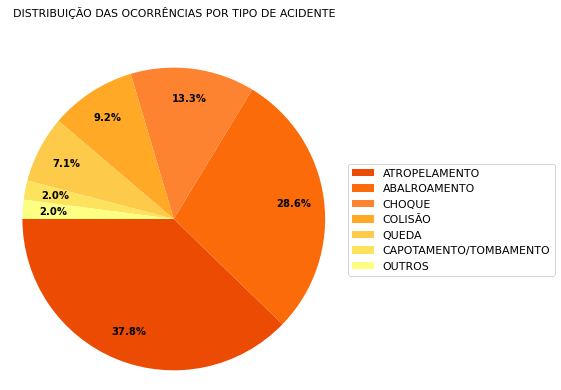

In [18]:
# Gráfico da Frequência por Tipo de Acidentes

# Dados
tipo_acidente = Base_Descritiva['DESC_TIPO_ACIDENTE'].value_counts()
total_registros = len(Base_Descritiva)
frequencia_relativa = (tipo_acidente / total_registros).round(2) * 100
labels = tipo_acidente.index
sizes = frequencia_relativa.values

# Formatação
plt.rcParams['font.family'] = 'DejaVu Sans'
cores = ['#EB4B03','#FC6B0A','#FE8330','#ffa927', '#fdca49', '#FDE25D', '#FDFF82']
textprops = {'fontweight': 'bold'}
fig, ax = plt.subplots(figsize=(6, 6)) # Configurações do gráfico 
ax.pie(sizes,autopct='%1.1f%%', startangle=180, pctdistance=0.8,textprops=textprops,colors=cores[:len(labels)])
ax.axis('equal') 
ax.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)# Organizando as labels
plt.title('DISTRIBUIÇÃO DAS OCORRÊNCIAS POR TIPO DE ACIDENTE', pad=40, fontsize=11)
plt.savefig('grafico_pizza.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Tabela de Evolução dos Acidentes
tabela_evolução_acidentes = pd.pivot_table(Base_Descritiva, values='NUMERO_BOLETIM', index='DESC_TIPO_ACIDENTE', columns='ANO', aggfunc='count')
tabela_evolução_acidentes.to_excel('tabela_evolução_acidentes.xlsx')
print(tabela_evolução_acidentes)

ANO                     2017  2018  2019
DESC_TIPO_ACIDENTE                      
ABALROAMENTO             146   128   189
ATROPELAMENTO            220   185   197
CAPOTAMENTO/TOMBAMENTO     9    15    16
CHOQUE                    70    61    83
COLISÃO                   56    42    49
OUTROS                    12    16    11
QUEDA                     58    31    33
